# Cross Validation

cross validation is a statistical method of evaluating general performance of a model that more stable than using _train\_test\_split_. Data is splitted to some numbers called _folds_ then it choose one of the fold as a test data and the rest uses as training data then score the performance. This procces the repeated using different fold for all of the folds. In the end we have numbers of scores.

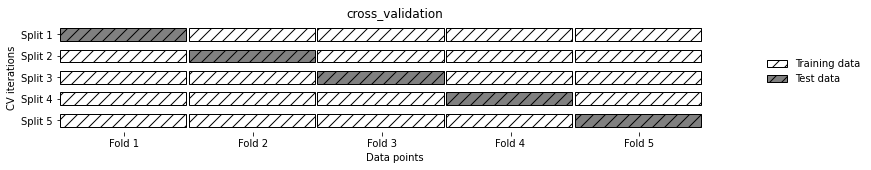

In [3]:
import mglearn
mglearn.plots.plot_cross_validation()

In [8]:
# cros validation using iris dataset
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
regressor = LogisticRegression()
score = cross_val_score(regressor, iris.data, iris.target, cv=3, verbose= 1)
print("Cross validation score {}".format(score))

Cross validation score [0.98 0.96 0.98]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [10]:
# summarize the cross validation using the mean
print("Summary score {:.3f}".format(score.mean()))

Summary score 0.973


## Stratified Cross Validation and other Strategies

In [12]:
# Using cross validation is not always pratical
# when dealing with classification.
# since the target could be sorted
# and the cross validation does not score the model
# for each target
print(iris.target) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


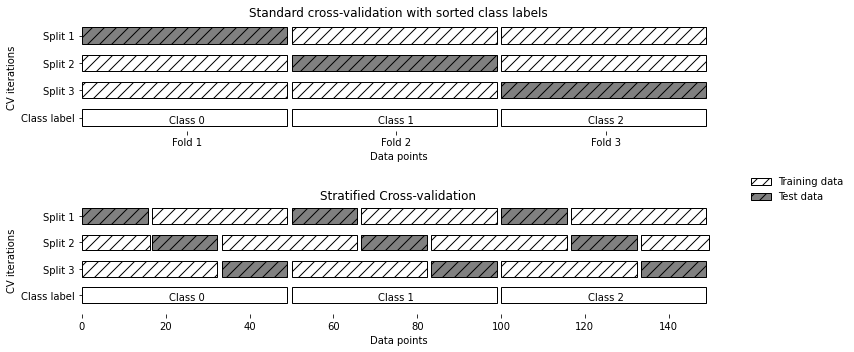

In [14]:
# Therefore we can use stratifed cross validation
mglearn.plots.plot_stratified_cross_validation()

### Controlling cross validation

In [19]:
# lets say we want to use other person
# cross validation configuration
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

# passing the kfold as a param in cv
print("Cross valiadation score {}".format(cross_val_score(regressor, iris.data,
    iris.target, cv=kfold)))

Cross valiadation score [0. 0. 0.]


In [21]:
# the results is realy not good
# we can use strafication or
# just shuffle the data
# make sure to pass the random state param
# or the result would be different for
# each run
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross valiadation score {}".format(cross_val_score(regressor, iris.data,
    iris.target, cv=kfold)))

Cross valiadation score [0.98 0.96 0.96]


### Leave one out cross validation

Works like K-fold CV but for each split a single data point is picked to be a test set. This could be time consuming for large dataset. 

In [23]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(regressor, iris.data, iris.target, cv=loo)
print("number of iterations {}".format(len(scores)))
print("mean accuracy {}".format(scores.mean()))

number of iterations 150
mean accuracy 0.9666666666666667


### Shuffle split cross validation

with this train size and test size can be defined and there are different.

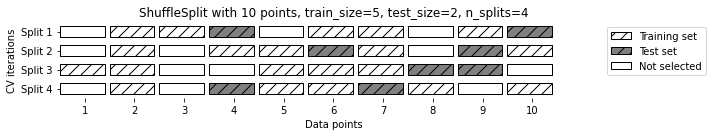

In [24]:
mglearn.plots.plot_shuffle_split()

In [25]:
# splitting data to 50% test and 50% train for 10 iterations
from sklearn.model_selection import ShuffleSplit
shuffle = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(regressor, iris.data, iris.target, cv=shuffle)
print("Cross valiadation score {}".format(scores))

# there is also a Stratified Shuffle variant for classification

Cross valiadation score [0.98666667 0.92       0.96       0.93333333 0.94666667 0.97333333
 0.92       0.97333333 0.94666667 0.96      ]


### Cross validation with groups

Say we want to build a face recognition model with dataset came from the same person, but we want our model to recognize the face of different person. With grouping we can defined which group that belongs to our train data and test data.

In [35]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

# create syntethic datasets
X, y = make_blobs(n_samples=12, random_state=0)
# we make grouping
groups = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
scores = cross_val_score(LogisticRegression(), X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Score {}".format(scores))

Score [0.5        0.66666667 1.        ]
